<a href="https://colab.research.google.com/github/Mario-Canon-Ayala/On-multifactorial-drivers-for-malaria-rebound-in-Brazil/blob/main/ML_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

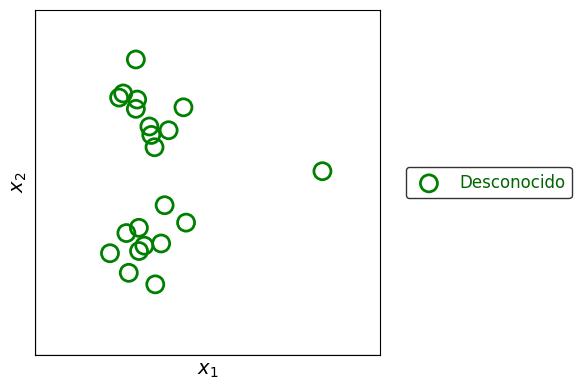

In [5]:
# =============================================================
# 09_unsupervised_illustration.py
# Figura conceptual de aprendizaje no supervisado
# =============================================================

import matplotlib.pyplot as plt
import numpy as np

# Datos simulados (dos grupos de puntos)
np.random.seed(42)
cluster1 = np.random.normal(loc=[1, 1], scale=0.2, size=(10, 2))
cluster2 = np.random.normal(loc=[1, 2.2], scale=0.2, size=(10, 2))
unknown = np.array([[2.5, 1.6]])  # punto desconocido

# Crear figura
fig, ax = plt.subplots(figsize=(6, 4))

# Dibujar puntos (sin etiquetas)
ax.scatter(cluster1[:, 0], cluster1[:, 1],
           facecolors='none', edgecolors='green', s=150, linewidths=2)
ax.scatter(cluster2[:, 0], cluster2[:, 1],
           facecolors='none', edgecolors='green', s=150, linewidths=2)

# Punto desconocido
ax.scatter(unknown[:, 0], unknown[:, 1],
           facecolors='none', edgecolors='green', s=150, linewidths=2, label='Desconocido')

# Ejes
ax.set_xlabel(r"$x_1$", fontsize=14)
ax.set_ylabel(r"$x_2$", fontsize=14)
ax.axhline(0, color='gray', linewidth=1)
ax.axvline(0, color='gray', linewidth=1)

# Límites y formato
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

# Leyenda externa con recuadro
legend = ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
                   frameon=True, edgecolor='black', fontsize=12)
plt.setp(legend.get_texts(), color='darkgreen')

# Ajustes finales
plt.tight_layout()
plt.savefig("unsupervised_illustration.png", dpi=200, bbox_inches='tight')
plt.show()


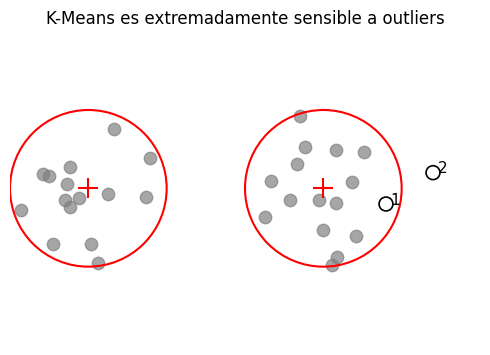

In [6]:
# =============================================================
# 10_kmeans_outlier_concept.py
# Demostración conceptual: K-Means es extremadamente sensible a outliers
# =============================================================
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Generar datos sintéticos: dos clusters compactos
np.random.seed(42)
cluster1 = np.random.normal(loc=[0, 0], scale=0.25, size=(15, 2))
cluster2 = np.random.normal(loc=[1.5, 0], scale=0.25, size=(15, 2))

# Outliers (puntos 1 y 2)
outliers = np.array([[1.9, -0.1], [2.2, 0.1]])

# Posiciones de los centroides (idealmente al centro de los grupos)
centroids = np.array([[0, 0], [1.5, 0]])

# Crear figura
fig, ax = plt.subplots(figsize=(5, 4))

# Dibujar puntos normales
ax.scatter(cluster1[:, 0], cluster1[:, 1], s=80, color='gray', alpha=0.7)
ax.scatter(cluster2[:, 0], cluster2[:, 1], s=80, color='gray', alpha=0.7)

# Dibujar centroides
ax.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='+', s=200)

# Dibujar círculos alrededor de cada cluster
for c in centroids:
    circle = Circle(c, 0.5, fill=False, color='red', lw=1.5)
    ax.add_patch(circle)

# Dibujar outliers
ax.scatter(outliers[:, 0], outliers[:, 1], s=100, facecolors='none', edgecolors='black', linewidths=1.2)
ax.text(outliers[0, 0]+0.03, outliers[0, 1], "1", fontsize=11, color='black')
ax.text(outliers[1, 0]+0.03, outliers[1, 1], "2", fontsize=11, color='black')

# Configurar ejes
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-1, 1)
ax.set_xticks([]); ax.set_yticks([])
ax.set_aspect('equal')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_title("K-Means es extremadamente sensible a outliers", fontsize=12)
plt.tight_layout()
plt.savefig("kmeans_outlier_concept.png", dpi=200, bbox_inches='tight')
plt.show()


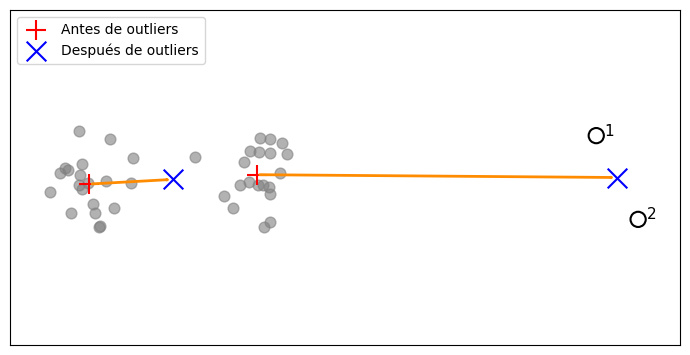

Desplazamiento del centroide 1: 1.002
Desplazamiento del centroide 2: 4.301


In [8]:
# =============================================================
# 11_kmeans_outlier_shift.py
# Demostración cuantitativa: desplazamiento de centroides por outliers
# =============================================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.patches import FancyArrowPatch

# 1️⃣ Datos base: dos clusters compactos
np.random.seed(42)
cluster1 = np.random.normal(loc=[0, 0], scale=0.3, size=(20, 2))
cluster2 = np.random.normal(loc=[2, 0], scale=0.3, size=(20, 2))
X = np.vstack([cluster1, cluster2])

# 2️⃣ Outliers lejanos
outliers = np.array([[6, 0.5], [6.5, -0.5]])

# 3️⃣ Entrenar K-Means con y sin outliers
kmeans_no_out = KMeans(n_clusters=2, random_state=42).fit(X)
kmeans_with_out = KMeans(n_clusters=2, random_state=42).fit(np.vstack([X, outliers]))

centers_no_out = kmeans_no_out.cluster_centers_
centers_with_out = kmeans_with_out.cluster_centers_

# 4️⃣ Graficar
fig, ax = plt.subplots(figsize=(7, 4))

# Puntos originales
ax.scatter(cluster1[:, 0], cluster1[:, 1], s=60, color='gray', alpha=0.6)
ax.scatter(cluster2[:, 0], cluster2[:, 1], s=60, color='gray', alpha=0.6)

# Outliers
ax.scatter(outliers[:, 0], outliers[:, 1], s=120, facecolors='none', edgecolors='black', linewidths=1.5)
ax.text(outliers[0, 0]+0.1, outliers[0, 1], "1", fontsize=11)
ax.text(outliers[1, 0]+0.1, outliers[1, 1], "2", fontsize=11)

# Centroides antes (rojos)
ax.scatter(centers_no_out[:, 0], centers_no_out[:, 1], color='red', marker='+', s=200, label='Antes de outliers')

# Centroides después (azules)
ax.scatter(centers_with_out[:, 0], centers_with_out[:, 1], color='blue', marker='x', s=200, label='Después de outliers')

# Flechas de desplazamiento
for i in range(2):
    arrow = FancyArrowPatch(posA=(centers_no_out[i, 0], centers_no_out[i, 1]),
                            posB=(centers_with_out[i, 0], centers_with_out[i, 1]),
                            arrowstyle="->", color='darkorange', lw=2)
    ax.add_patch(arrow)

# Configuración visual
ax.set_xlim(-1, 7)
ax.set_ylim(-2, 2)
ax.set_xticks([]); ax.set_yticks([])
ax.set_aspect('equal')
ax.legend(loc='upper left', fontsize=10)
#ax.set_title("K-Means es extremadamente sensible a outliers", fontsize=12)

plt.tight_layout()
plt.savefig("kmeans_outlier_shift.png", dpi=200, bbox_inches='tight')
plt.show()

# 5️⃣ Mostrar desplazamientos numéricos
shifts = np.linalg.norm(centers_with_out - centers_no_out, axis=1)
for i, s in enumerate(shifts, 1):
    print(f"Desplazamiento del centroide {i}: {s:.3f}")


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


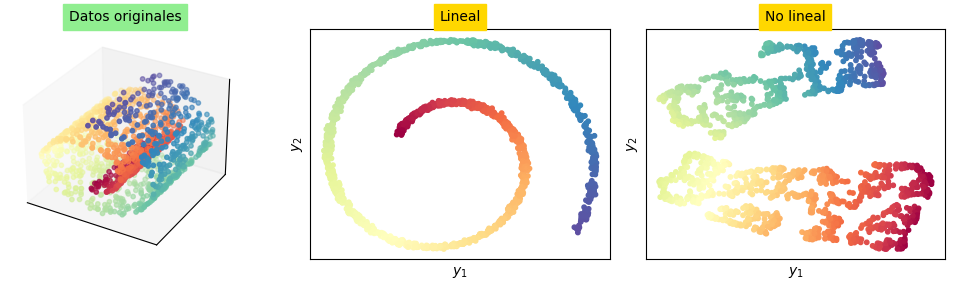

In [10]:
# =============================================================
# 12_linear_vs_nonlinear_dimred.py
# Comparación: reducción lineal vs no lineal (PCA vs t-SNE)
# =============================================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 1️⃣ Generar datos tipo Swiss roll
X, color = make_swiss_roll(n_samples=1500, noise=0.1, random_state=42)

# 2️⃣ Reducción lineal (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 3️⃣ Reducción no lineal (t-SNE)
tsne = TSNE(n_components=2, perplexity=30, random_state=42, init="pca", n_iter=1000)
X_tsne = tsne.fit_transform(X)

# 4️⃣ Crear figura
fig = plt.figure(figsize=(10, 3))

# --- Original data (3D) ---
ax = fig.add_subplot(131, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap='Spectral', s=10)
ax.set_title("Datos originales", fontsize=10, backgroundcolor='lightgreen')
ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])

# --- Linear (PCA) ---
ax2 = fig.add_subplot(132)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap='Spectral', s=10)
ax2.set_xlabel("$y_1$"); ax2.set_ylabel("$y_2$")
ax2.set_title("Lineal", fontsize=10, backgroundcolor='gold')
ax2.set_xticks([]); ax2.set_yticks([])

# --- Non-linear (t-SNE) ---
ax3 = fig.add_subplot(133)
ax3.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap='Spectral', s=10)
ax3.set_xlabel("$y_1$"); ax3.set_ylabel("$y_2$")
ax3.set_title("No lineal", fontsize=10, backgroundcolor='gold')
ax3.set_xticks([]); ax3.set_yticks([])

# 5️⃣ Ajustes visuales
plt.tight_layout()
plt.savefig("linear_vs_nonlinear_dimred.png", dpi=200, bbox_inches='tight')
plt.show()


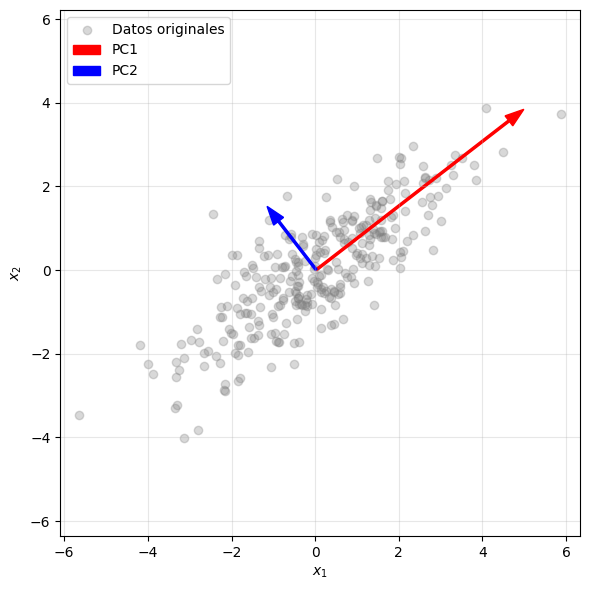

In [12]:
# ===============================================================
# 13_pca_eigendecomposition.py
# Visualización geométrica de la descomposición en valores propios (PCA)
# ===============================================================
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Generar datos correlacionados en 2D
np.random.seed(42)
X = np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[3, 2], [2, 2]],
    size=300
)

# 2️⃣ Calcular la matriz de covarianza y la descomposición en valores propios
C = np.cov(X.T)
eigenvalues, eigenvectors = np.linalg.eig(C)

# 3️⃣ Ordenar por magnitud de los valores propios (descendente)
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# 4️⃣ Crear figura
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:, 0], X[:, 1], alpha=0.3, label="Datos originales", color='gray')

# 5️⃣ Dibujar los vectores propios (componentes principales)
origin = np.mean(X, axis=0)
for i in range(len(eigenvalues)):
    vec = eigenvectors[:, i] * np.sqrt(eigenvalues[i]) * 3
    ax.arrow(
        origin[0], origin[1],
        vec[0], vec[1],
        color=['red', 'blue'][i],
        width=0.05, head_width=0.3,
        length_includes_head=True,
        label=f'PC{i+1}'
    )

# 6️⃣ Formato visual
#ax.set_title("PCA – Descomposición en valores propios", fontsize=12)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.axis('equal')
ax.grid(alpha=0.3)
ax.legend(loc="upper left")
plt.tight_layout()
plt.savefig("pca_eigendecomposition.png", dpi=200, bbox_inches='tight')
plt.show()


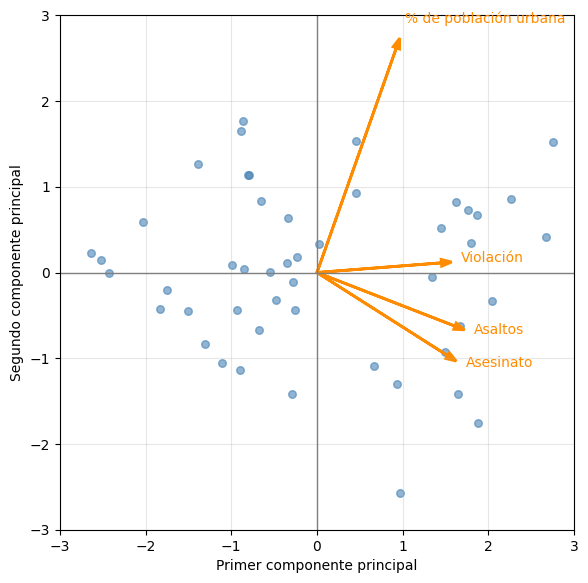


Vectores de carga (phi):

                            PC1       PC2
Asesinato              0.541550 -0.344518
Asaltos                0.573628 -0.222941
% de población urbana  0.321803  0.911016
Violación              0.523563  0.040666


In [8]:
# ===============================================================
# 14_pca_biplot_usarrests_final.py
# PCA biplot reproducido localmente (sin conexión, corregido)
# ===============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1️⃣ Dataset USArrests (exactamente 50 estados)
data = pd.DataFrame({
    "Asesinato": [
        13.2, 10.0, 8.1, 8.8, 9.0, 7.9, 3.3, 5.9, 15.4, 17.4,
        5.3, 2.6, 10.4, 7.2, 2.2, 6.0, 9.7, 15.4, 2.1, 11.3,
        4.4, 12.1, 2.7, 8.5, 4.0, 12.2, 2.1, 7.4, 11.4, 11.1,
        13.0, 0.8, 7.3, 6.6, 4.9, 6.3, 3.4, 14.4, 3.8, 13.2,
        12.7, 3.2, 2.2, 8.5, 7.8, 6.0, 9.7, 11.1, 4.8, 5.5
    ],
    "Asaltos": [
        236, 263, 294, 190, 276, 204, 110, 238, 335, 211,
        46, 120, 249, 113, 56, 115, 109, 249, 83, 300,
        149, 255, 72, 159, 145, 254, 57, 159, 285, 254,
        337, 45, 120, 151, 159, 106, 174, 279, 86, 188,
        201, 120, 48, 156, 174, 140, 70, 101, 120, 178
    ],
    "% de población urbana": [
        58, 48, 80, 50, 91, 78, 77, 72, 80, 60,
        83, 54, 83, 65, 57, 74, 52, 83, 51, 67,
        85, 74, 66, 70, 63, 79, 59, 62, 70, 83,
        45, 44, 59, 56, 83, 52, 62, 66, 57, 59,
        80, 75, 60, 69, 76, 50, 59, 80, 77, 63
    ],
    "Violación": [
        21.2, 44.5, 31.0, 19.5, 40.6, 38.7, 11.1, 15.8, 31.9, 25.8,
        20.2, 14.2, 36.4, 16.3, 11.5, 18.0, 16.4, 32.3, 26.1, 25.8,
        9.0, 21.0, 11.3, 16.1, 18.0, 26.2, 9.3, 18.0, 32.1, 26.1,
        16.1, 7.3, 16.5, 20.0, 29.3, 17.4, 23.5, 19.3, 15.7, 21.9,
        25.2, 20.7, 7.8, 14.9, 11.6, 18.0, 28.2, 24.0, 16.3, 22.5
    ]
}, index=[
    "Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia",
    "Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts",
    "Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey",
    "New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island",
    "South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"
])

# 2️⃣ Estandarizar los datos
X = StandardScaler().fit_transform(data)

# 3️⃣ Aplicar PCA (2 componentes principales)
pca = PCA(n_components=2)
scores = pca.fit_transform(X)
loadings = pca.components_.T

# 4️⃣ Graficar el biplot
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(scores[:, 0], scores[:, 1], alpha=0.6, s=30, color='steelblue')
ax.axhline(0, color='gray', lw=1)
ax.axvline(0, color='gray', lw=1)

# --- Vectores de carga ---
for i, var in enumerate(data.columns):
    ax.arrow(0, 0,
             loadings[i, 0]*3, loadings[i, 1]*3,
             color='darkorange', lw=2, head_width=0.08, length_includes_head=True)
    ax.text(loadings[i, 0]*3.2, loadings[i, 1]*3.2, var, color='darkorange', fontsize=10)

# --- Configuración ---
ax.set_xlabel("Primer componente principal")
ax.set_ylabel("Segundo componente principal")
#ax.set_title("PCA Biplot – USArrests", fontsize=12)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.grid(alpha=0.3)
ax.set_aspect('equal')
plt.tight_layout()
plt.savefig("pca_biplot.png", dpi=200, bbox_inches='tight')
plt.show()

# 5️⃣ Mostrar los loadings
print("\nVectores de carga (phi):\n")
loading_df = pd.DataFrame(loadings, columns=["PC1", "PC2"], index=data.columns)
print(loading_df.round(6))




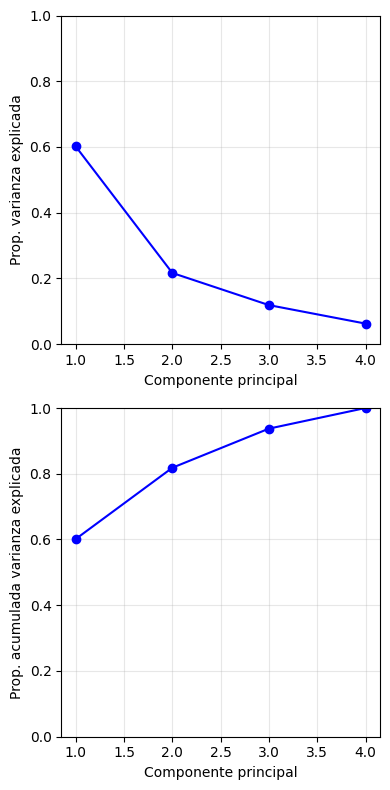

In [14]:
# ============================================
# Scree Plot (PCA - Proporción de varianza explicada)
# ============================================

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1️⃣ Dataset USArrests (exactamente 50 estados)
data = pd.DataFrame({
    "Asesinato": [
        13.2, 10.0, 8.1, 8.8, 9.0, 7.9, 3.3, 5.9, 15.4, 17.4,
        5.3, 2.6, 10.4, 7.2, 2.2, 6.0, 9.7, 15.4, 2.1, 11.3,
        4.4, 12.1, 2.7, 8.5, 4.0, 12.2, 2.1, 7.4, 11.4, 11.1,
        13.0, 0.8, 7.3, 6.6, 4.9, 6.3, 3.4, 14.4, 3.8, 13.2,
        12.7, 3.2, 2.2, 8.5, 7.8, 6.0, 9.7, 11.1, 4.8, 5.5
    ],
    "Asaltos": [
        236, 263, 294, 190, 276, 204, 110, 238, 335, 211,
        46, 120, 249, 113, 56, 115, 109, 249, 83, 300,
        149, 255, 72, 159, 145, 254, 57, 159, 285, 254,
        337, 45, 120, 151, 159, 106, 174, 279, 86, 188,
        201, 120, 48, 156, 174, 140, 70, 101, 120, 178
    ],
    "% de población urbana": [
        58, 48, 80, 50, 91, 78, 77, 72, 80, 60,
        83, 54, 83, 65, 57, 74, 52, 83, 51, 67,
        85, 74, 66, 70, 63, 79, 59, 62, 70, 83,
        45, 44, 59, 56, 83, 52, 62, 66, 57, 59,
        80, 75, 60, 69, 76, 50, 59, 80, 77, 63
    ],
    "Violación": [
        21.2, 44.5, 31.0, 19.5, 40.6, 38.7, 11.1, 15.8, 31.9, 25.8,
        20.2, 14.2, 36.4, 16.3, 11.5, 18.0, 16.4, 32.3, 26.1, 25.8,
        9.0, 21.0, 11.3, 16.1, 18.0, 26.2, 9.3, 18.0, 32.1, 26.1,
        16.1, 7.3, 16.5, 20.0, 29.3, 17.4, 23.5, 19.3, 15.7, 21.9,
        25.2, 20.7, 7.8, 14.9, 11.6, 18.0, 28.2, 24.0, 16.3, 22.5
    ]
}, index=[
    "Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia",
    "Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts",
    "Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey",
    "New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island",
    "South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"
])

# 2️⃣ Estandarizar los datos
X_scaled = StandardScaler().fit_transform(data)

# 3️⃣ PCA
pca = PCA()
pca.fit(X_scaled)

# 4️⃣ Varianza explicada
explained_var = pca.explained_variance_ratio_
cumulative_var = explained_var.cumsum()

# 5️⃣ Figura del Scree plot
fig, axes = plt.subplots(2, 1, figsize=(4, 8))

# --- Parte superior: PVE ---
axes[0].plot(range(1, len(explained_var)+1), explained_var, 'o-', color='blue')
axes[0].set_xlabel('Componente principal')
axes[0].set_ylabel('Prop. varianza explicada')
axes[0].set_ylim(0, 1)
axes[0].grid(alpha=0.3)

# --- Parte inferior: PVE acumulada ---
axes[1].plot(range(1, len(cumulative_var)+1), cumulative_var, 'o-', color='blue')
axes[1].set_xlabel('Componente principal')
axes[1].set_ylabel('Prop. acumulada varianza explicada')
axes[1].set_ylim(0, 1)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig("pca2.png", dpi=200, bbox_inches='tight')
plt.show()



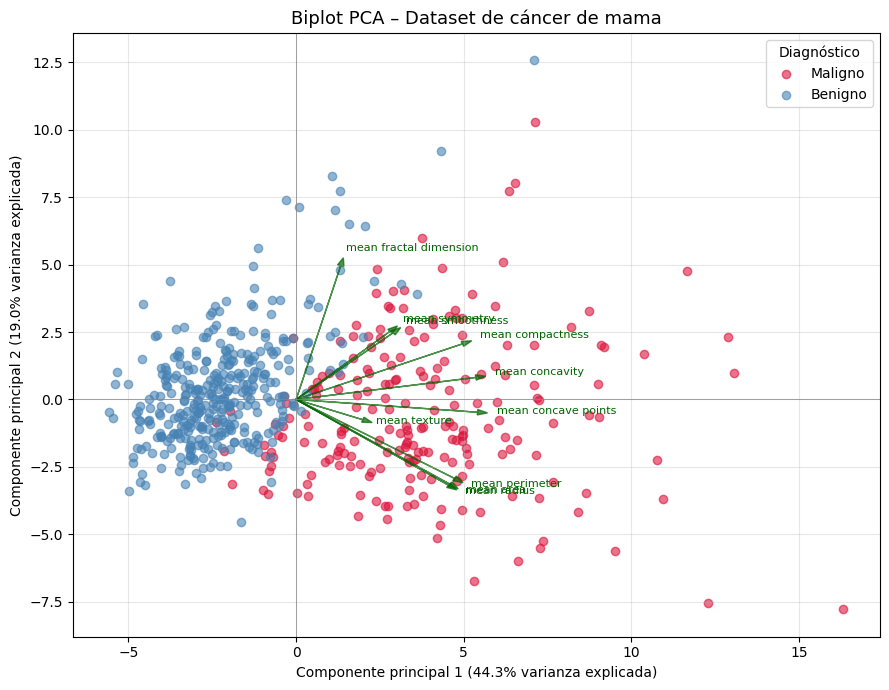

In [21]:
# ============================================================
# Biplot PCA - Dataset de Cáncer de Mama (Breast Cancer)
# ============================================================

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1️⃣ Cargar dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='diagnóstico')
clases = ['Maligno', 'Benigno']  # en sklearn: 0 = maligno, 1 = benigno

# 2️⃣ Estandarización
X_scaled = StandardScaler().fit_transform(X)

# 3️⃣ PCA con 2 componentes principales
pca = PCA(n_components=2)
Z = pca.fit_transform(X_scaled)

# 4️⃣ Vectores de carga (loadings)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# 5️⃣ Crear figura
plt.figure(figsize=(9,7))

# --- Puntos proyectados ---
plt.scatter(Z[y == 0, 0], Z[y == 0, 1], label='Maligno', alpha=0.6, color='crimson')
plt.scatter(Z[y == 1, 0], Z[y == 1, 1], label='Benigno', alpha=0.6, color='steelblue')

# --- Vectores de carga (flechas de variables) ---
for i, feature in enumerate(data.feature_names[:10]):  # mostramos 10 variables para legibilidad
    plt.arrow(0, 0, loadings[i, 0]*6, loadings[i, 1]*6,
              color='darkgreen', alpha=0.7, head_width=0.2, length_includes_head=True)
    plt.text(loadings[i, 0]*6.3, loadings[i, 1]*6.3, feature, color='darkgreen', fontsize=8)

# --- Ejes y etiquetas ---
plt.xlabel(f"Componente principal 1 ({pca.explained_variance_ratio_[0]*100:.1f}% varianza explicada)")
plt.ylabel(f"Componente principal 2 ({pca.explained_variance_ratio_[1]*100:.1f}% varianza explicada)")
plt.title("Biplot PCA – Dataset de cáncer de mama", fontsize=13)
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.legend(title="Diagnóstico", loc='upper right')
plt.grid(alpha=0.3)
plt.tight_layout()

# 6️⃣ Guardar y mostrar
plt.savefig("pca_breast_cancer_biplot.png", dpi=300, bbox_inches="tight")
plt.show()




/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


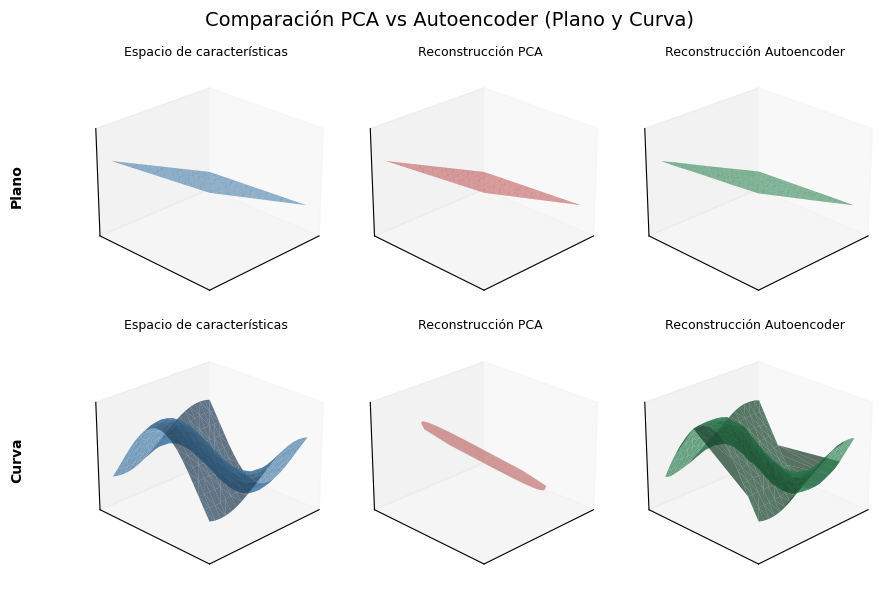

In [25]:
# ============================================================
# Comparación PCA vs Autoencoder (Plano vs Curva)
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Crear datos
n = 400
x = np.linspace(-2, 2, int(np.sqrt(n)))
y = np.linspace(-2, 2, int(np.sqrt(n)))
X, Y = np.meshgrid(x, y)

# --- Superficie plana ---
Z_plane = 0.5 * X + 0.2 * Y + 0.3
plane = np.column_stack((X.ravel(), Y.ravel(), Z_plane.ravel()))

# --- Superficie curva ---
Z_curve = np.sin(X) * np.cos(Y)
curve = np.column_stack((X.ravel(), Y.ravel(), Z_curve.ravel()))

datasets = {"Plano": plane, "Curva": curve}

# Estandarizador
scaler = StandardScaler()

# Figura
fig = plt.figure(figsize=(9, 6))
fig.suptitle("Comparación PCA vs Autoencoder (Plano y Curva)", fontsize=14)

# Índices de fila (Plano arriba, Curva abajo)
for i, (nombre, data) in enumerate(datasets.items()):
    X_scaled = scaler.fit_transform(data)

    # PCA
    pca = PCA(n_components=2)
    X_pca = pca.inverse_transform(pca.fit_transform(X_scaled))

    # Autoencoder mejorado
    autoencoder = Sequential([
        Dense(64, activation='relu', input_shape=(3,)),
        Dense(16, activation='relu'),
        Dense(2, activation='tanh', name='bottleneck'),
        Dense(16, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='linear')
    ])
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.fit(X_scaled, X_scaled, epochs=300, batch_size=32, verbose=0)
    X_auto = autoencoder.predict(X_scaled)

    # Original
    ax1 = fig.add_subplot(2, 3, i*3 + 1, projection='3d')
    ax1.plot_trisurf(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], color='steelblue', alpha=0.7)
    ax1.set_title("Espacio de características", fontsize=9)

    # PCA
    ax2 = fig.add_subplot(2, 3, i*3 + 2, projection='3d')
    ax2.plot_trisurf(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], color='indianred', alpha=0.7)
    ax2.set_title("Reconstrucción PCA", fontsize=9)

    # Autoencoder
    ax3 = fig.add_subplot(2, 3, i*3 + 3, projection='3d')
    ax3.plot_trisurf(X_auto[:, 0], X_auto[:, 1], X_auto[:, 2], color='seagreen', alpha=0.7)
    ax3.set_title("Reconstrucción Autoencoder", fontsize=9)

    # Etiquetas de fila
    ax1.text2D(-0.3, 0.5, f"{nombre}", transform=ax1.transAxes,
               fontsize=10, rotation=90, weight="bold", va="center")

    for ax in [ax1, ax2, ax3]:
        ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
        ax.view_init(elev=25, azim=45)

plt.tight_layout()
plt.savefig("comparacion_pca_autoencoder.png", dpi=300, bbox_inches="tight")
plt.show()



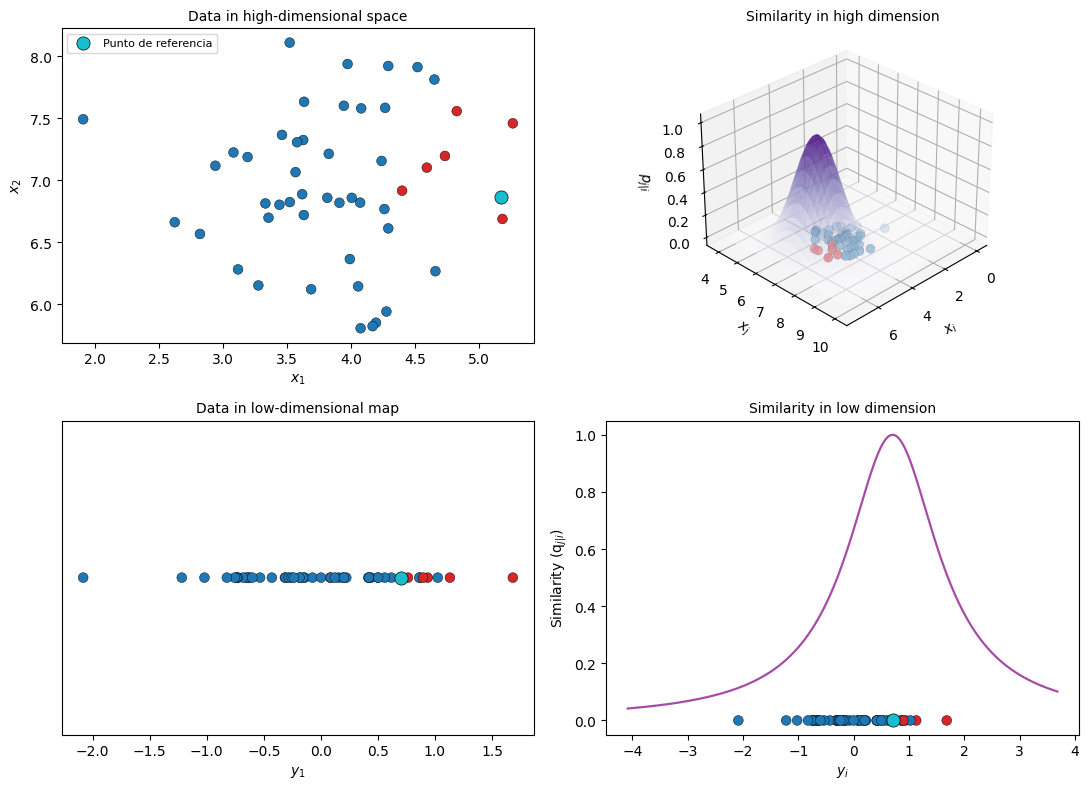

In [32]:
# ============================================================
# Visualización conceptual de Stochastic Neighbor Embedding (SNE)
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

# 1️⃣ Generar datos en "alta dimensión" (2D simulada)
np.random.seed(42)
X_high = np.random.normal(loc=[4, 7], scale=[0.8, 0.6], size=(50, 2))

# 2️⃣ Elegimos un punto central (por ejemplo, el 10) y marcamos sus vecinos más cercanos
center_idx = 10
distances = np.linalg.norm(X_high - X_high[center_idx], axis=1)
neighbors_idx = np.argsort(distances)[1:7]  # 6 vecinos más cercanos

colors = np.array(["tab:blue"] * len(X_high))
colors[center_idx] = "tab:red"
colors[neighbors_idx] = "tab:red"  # más puntos rojos alrededor del punto central

# 3️⃣ Simular proyección a baja dimensión (1D)
X_low = (X_high[:, 0] - np.mean(X_high[:, 0])) + np.random.normal(0, 0.3, len(X_high))

# 4️⃣ Crear figura
fig = plt.figure(figsize=(11, 8))

# --- (a) Datos en espacio de alta dimensión ---
ax1 = fig.add_subplot(2, 2, 1)
ax1.scatter(X_high[:, 0], X_high[:, 1], c=colors, s=50, edgecolor='k', linewidth=0.3)
ax1.scatter(X_high[center_idx, 0], X_high[center_idx, 1],
            c='tab:cyan', s=90, edgecolor='k', linewidth=0.5, label="Punto de referencia")
ax1.set_title("Data in high-dimensional space", fontsize=10)
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.legend(loc="upper left", fontsize=8)

# --- (b) Similitud en alta dimensión (función gaussiana centrada en el punto rojo central) ---
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
x = np.linspace(X_high[:, 0].min() - 2, X_high[:, 0].max() + 2, 80)
y = np.linspace(X_high[:, 1].min() - 2, X_high[:, 1].max() + 2, 80)
Xg, Yg = np.meshgrid(x, y)

# Centro de la gaussiana = punto central
cx, cy = X_high[center_idx]
sigma = 0.9
R = np.sqrt((Xg - cx) ** 2 + (Yg - cy) ** 2)
Z = norm.pdf(R, 0, sigma)
Z /= Z.max()

ax2.plot_surface(Xg, Yg, Z, cmap='Purples', alpha=0.6, linewidth=0)
ax2.scatter(X_high[:, 0], X_high[:, 1], np.zeros(len(X_high)), c=colors, s=40, edgecolor='k', linewidth=0.3)
ax2.set_title("Similarity in high dimension", fontsize=10)
ax2.set_xlabel("$x_i$")
ax2.set_ylabel("$x_j$")
ax2.set_zlabel("$p_{j|i}$")
ax2.view_init(elev=30, azim=45)

# --- (c) Datos en baja dimensión ---
ax3 = fig.add_subplot(2, 2, 3)
ax3.scatter(X_low, np.zeros_like(X_low), c=colors, s=50, edgecolor='k', linewidth=0.3)
ax3.scatter(X_low[center_idx], 0, c='tab:cyan', s=90, edgecolor='k', linewidth=0.5)
ax3.set_title("Data in low-dimensional map", fontsize=10)
ax3.set_xlabel("$y_1$")
ax3.set_yticks([])

# --- (d) Similitud en baja dimensión (distribución t simplificada) ---
ax4 = fig.add_subplot(2, 2, 4)
x1d = np.linspace(X_low.min() - 2, X_low.max() + 2, 400)
d = x1d - X_low[center_idx]
q = 1.0 / (1.0 + d ** 2)
q /= q.max()
ax4.plot(x1d, q, color='purple', alpha=0.7, lw=1.6)
ax4.scatter(X_low, np.zeros_like(X_low), c=colors, s=50, edgecolor='k', linewidth=0.3)
ax4.scatter(X_low[center_idx], 0, c='tab:cyan', s=90, edgecolor='k', linewidth=0.5)
ax4.set_title("Similarity in low dimension", fontsize=10)
ax4.set_xlabel("$y_i$")
ax4.set_ylabel("Similarity (q$_{j|i}$)")

plt.tight_layout()
plt.savefig("sne_conceptual_vecinos.png", dpi=300, bbox_inches="tight")
plt.show()




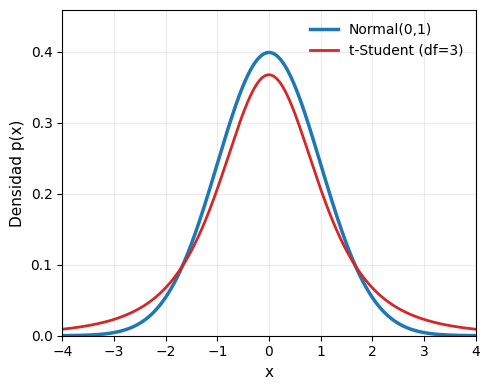

In [34]:
# -*- coding: utf-8 -*-
"""
student_t_vs_gaussian.py
Comparación: distribución normal vs t-Student (colas largas)
Genera student_t_vs_gaussian.png
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

# Parámetros
x = np.linspace(-4, 4, 1000)
mu = 0.0
sigma = 1.0

# Gaussian (normal estándar)
pdf_norm = norm.pdf(x, loc=mu, scale=sigma)

# t-Student: grados de libertad (df). df small -> colas más largas.
df = 3  # prueba 1, 2, 3, 5 para ver diferencias; df=1 es Cauchy (muy pesado)
pdf_t = t.pdf(x, df=df, loc=mu, scale=1.0)  # scale=1 para comparativa directa

# Opcional: si quieres que la t tenga la misma varianza que la normal,
# puedes reescalar (no lo hacemos por defecto porque queremos comparar colas).
# var_t = df / (df - 2)  (si df>2)

# Plot
plt.figure(figsize=(5,4))
plt.plot(x, pdf_norm, lw=2.5, label='Normal(0,1)', color='tab:blue')
plt.plot(x, pdf_t,   lw=2.0, label=f't-Student (df={df})', color='tab:red')

# Estética
plt.xlabel('x', fontsize=11)
plt.ylabel('Densidad p(x)', fontsize=11)
#plt.title('Comparación: Normal vs t-Student', fontsize=12)
plt.xlim(-4, 4)
plt.ylim(0, max(pdf_norm.max(), pdf_t.max()) * 1.15)
plt.grid(alpha=0.25)
plt.legend(frameon=False, fontsize=10)

# Guardar y mostrar
plt.tight_layout()
plt.savefig("student_t_vs_gaussian.png", dpi=300)
plt.show()


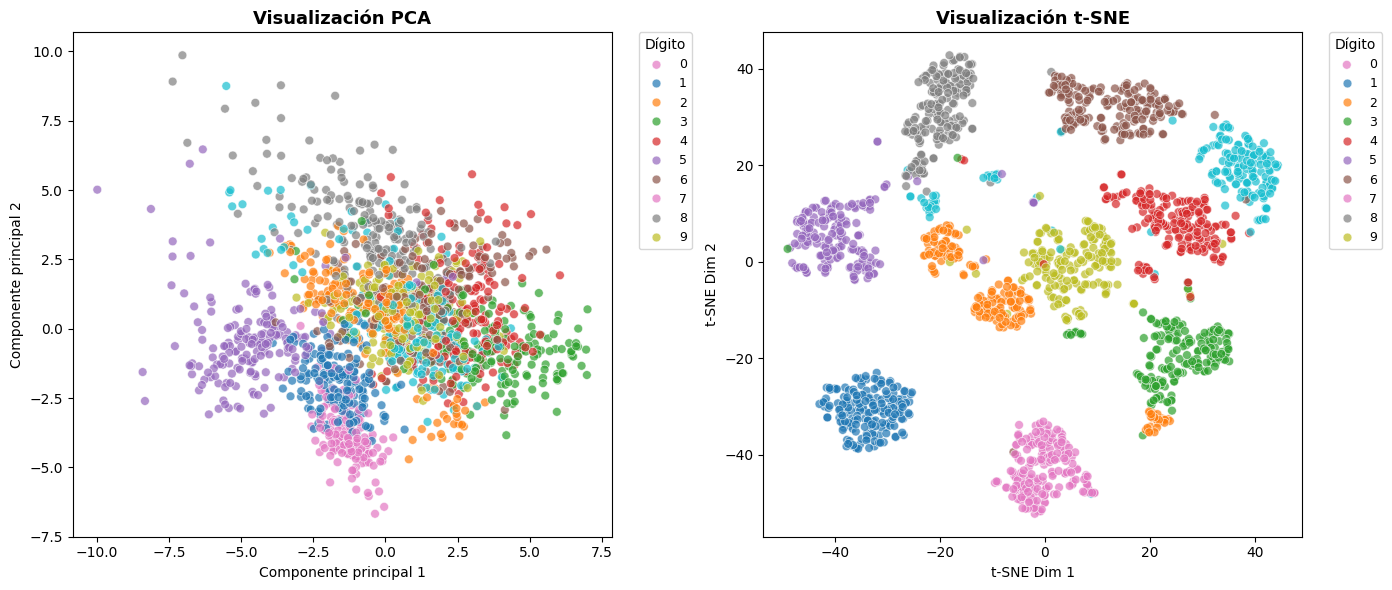

In [44]:
# -*- coding: utf-8 -*-
"""
Visualización PCA vs t-SNE con el dataset Digits (scikit-learn)
Con leyenda de dígitos y exportación en PNG (200 dpi)
"""

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 1️⃣ Cargar dataset Digits (1797 muestras, 64 variables)
digits = load_digits()
X = digits.data
y = digits.target
clases = [str(i) for i in np.unique(y)]

# 2️⃣ Tomar muestra (puedes ajustar el tamaño si deseas)
np.random.seed(42)
idx = np.random.choice(len(X), 1797, replace=False)
X_sample = X[idx]
y_sample = y[idx]

# 3️⃣ Escalar datos
X_scaled = StandardScaler().fit_transform(X_sample)

# 4️⃣ PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5️⃣ t-SNE
tsne = TSNE(n_components=2, init='pca', perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 6️⃣ DataFrames
df_pca = pd.DataFrame(X_pca, columns=['pca-one', 'pca-two'])
df_pca['y'] = y_sample
df_tsne = pd.DataFrame(X_tsne, columns=['tsne-one', 'tsne-two'])
df_tsne['y'] = y_sample

# 7️⃣ Figura comparativa
plt.figure(figsize=(14,6))

# PCA
ax1 = plt.subplot(1,2,1)
sns.scatterplot(
    x="pca-one", y="pca-two", hue="y",
    palette=sns.color_palette("tab10", 10),
    data=df_pca, alpha=0.7, s=40, ax=ax1
)
plt.title("Visualización PCA", fontsize=13, weight='bold')
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend(
    title="Dígito", labels=clases,
    bbox_to_anchor=(1.05, 1), loc='upper left',
    borderaxespad=0., fontsize=9, title_fontsize=10
)

# t-SNE
ax2 = plt.subplot(1,2,2)
sns.scatterplot(
    x="tsne-one", y="tsne-two", hue="y",
    palette=sns.color_palette("tab10", 10),
    data=df_tsne, alpha=0.7, s=40, ax=ax2
)
plt.title("Visualización t-SNE", fontsize=13, weight='bold')
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.legend(
    title="Dígito", labels=clases,
    bbox_to_anchor=(1.05, 1), loc='upper left',
    borderaxespad=0., fontsize=9, title_fontsize=10
)

plt.tight_layout()
plt.savefig("pca_tsne_digits_fast_200dpi.png", dpi=200, bbox_inches="tight")
plt.show()




circles, perplexity=5 in 0.46 sec
circles, perplexity=30 in 1.4 sec
circles, perplexity=50 in 1.3 sec
circles, perplexity=100 in 1.1 sec
S-curve, perplexity=5 in 0.41 sec
S-curve, perplexity=30 in 0.31 sec
S-curve, perplexity=50 in 0.36 sec
S-curve, perplexity=100 in 0.39 sec
uniform grid, perplexity=5 in 0.27 sec
uniform grid, perplexity=30 in 0.37 sec
uniform grid, perplexity=50 in 0.42 sec
uniform grid, perplexity=100 in 0.41 sec


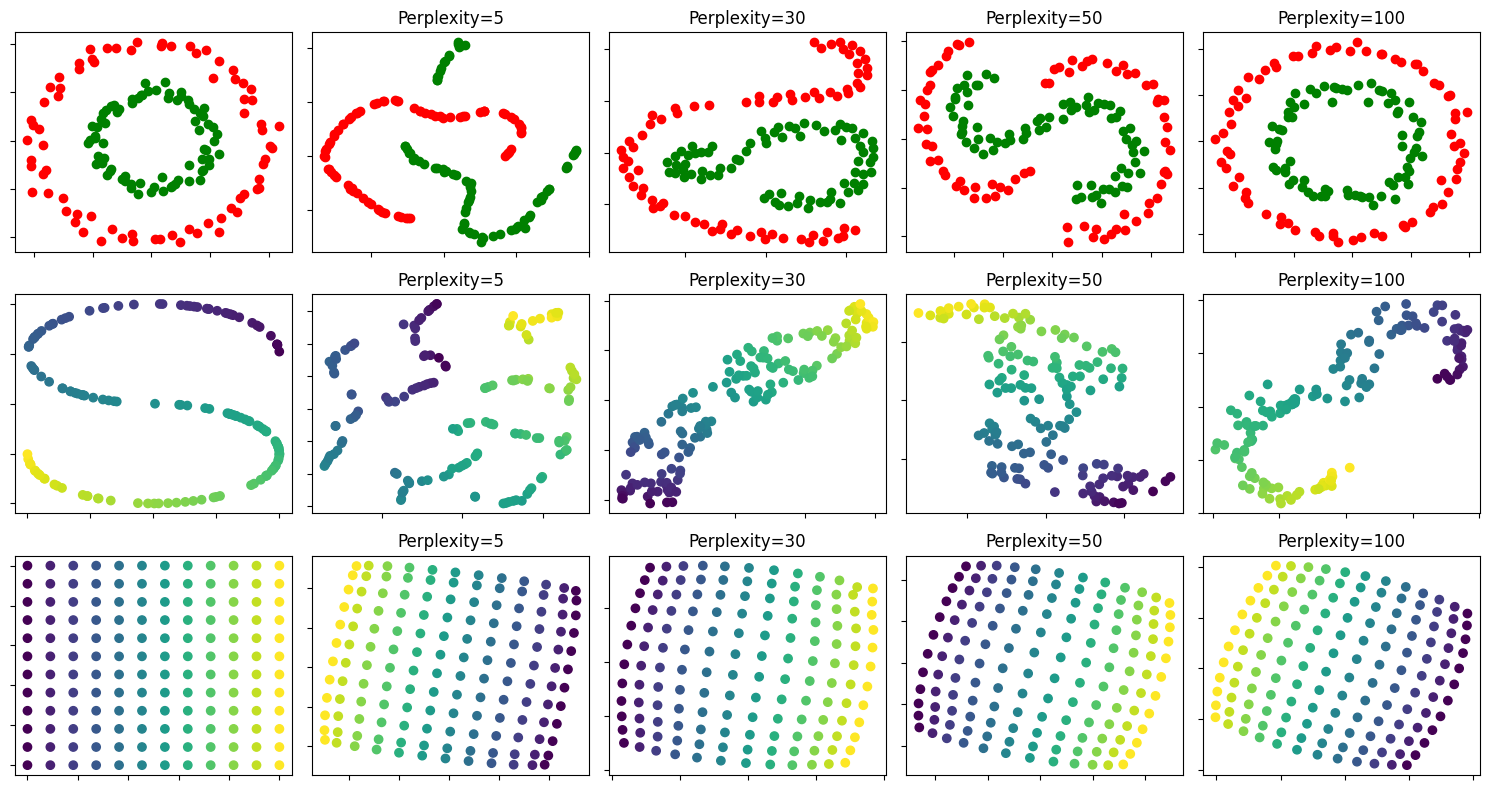

In [48]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

from time import time

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import NullFormatter

from sklearn import datasets, manifold

n_samples = 150
n_components = 2
(fig, subplots) = plt.subplots(3, 5, figsize=(15, 8))
perplexities = [5, 30, 50, 100]

X, y = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=0
)

red = y == 0
green = y == 1

ax = subplots[0][0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        max_iter=300,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

# Another example using s-curve
X, color = datasets.make_s_curve(n_samples, random_state=0)

ax = subplots[1][0]
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[1][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=10,
        perplexity=perplexity,
        learning_rate="auto",
        max_iter=300,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


# Another example using a 2D uniform grid
x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X = np.hstack(
    [
        xx.ravel().reshape(-1, 1),
        yy.ravel().reshape(-1, 1),
    ]
)
color = xx.ravel()
ax = subplots[2][0]
ax.scatter(X[:, 0], X[:, 1], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[2][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=10,
        perplexity=perplexity,
        max_iter=400,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


plt.tight_layout()
plt.savefig("perplexity.png", dpi=200, bbox_inches="tight")
plt.show()

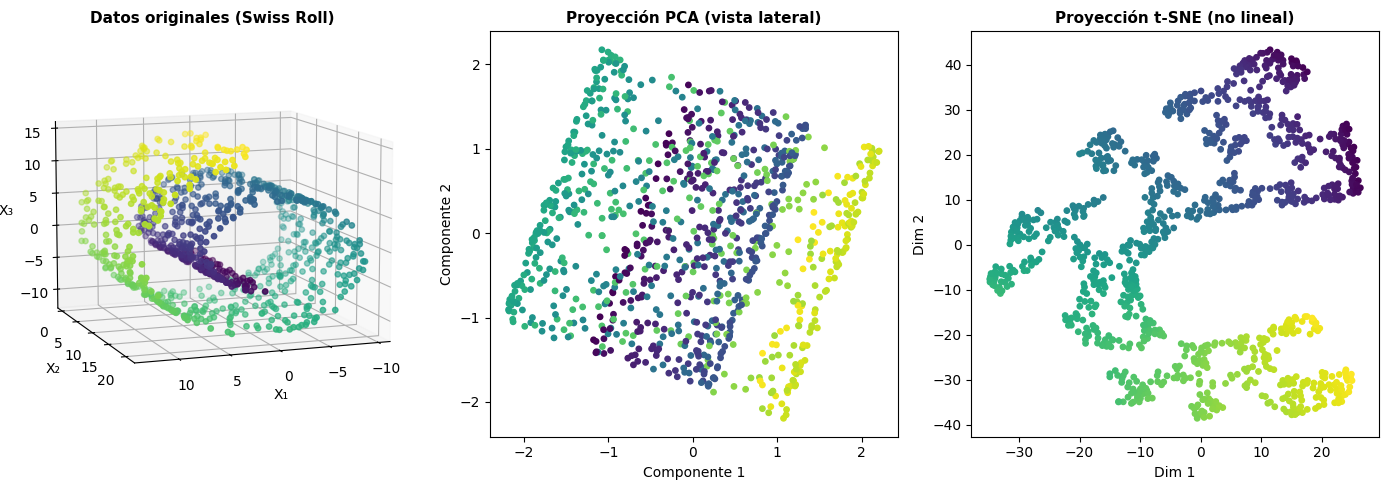

In [50]:
# -*- coding: utf-8 -*-
"""
Comparación PCA vs t-SNE con vista lateral del Swiss Roll
Autor: Adaptado para visualización académica
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# 1️⃣ Generar el dataset Swiss Roll (1000 puntos)
X, color = make_swiss_roll(n_samples=1000, noise=0.05, random_state=42)

# 2️⃣ Escalar datos
X_scaled = StandardScaler().fit_transform(X)

# 3️⃣ PCA (lineal)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4️⃣ t-SNE (no lineal)
tsne = TSNE(n_components=2, init='pca', perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 5️⃣ Figura comparativa
fig = plt.figure(figsize=(14, 5))

# --- Swiss Roll 3D ---
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.viridis, s=15)
ax.view_init(elev=10, azim=70)  # Vista más lateral
ax.set_title("Datos originales (Swiss Roll)", fontsize=11, weight='bold')
ax.set_xlabel("X₁")
ax.set_ylabel("X₂")
ax.set_zlabel("X₃")

# --- PCA (vista lateral simulada) ---
plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.viridis, s=15)
plt.title("Proyección PCA (vista lateral)", fontsize=11, weight='bold')
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")

# --- t-SNE ---
plt.subplot(1, 3, 3)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap=plt.cm.viridis, s=15)
plt.title("Proyección t-SNE (no lineal)", fontsize=11, weight='bold')
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")

plt.tight_layout()
plt.savefig("swissroll_pca_tsne_lateral_200dpi.png", dpi=200, bbox_inches="tight")
plt.show()



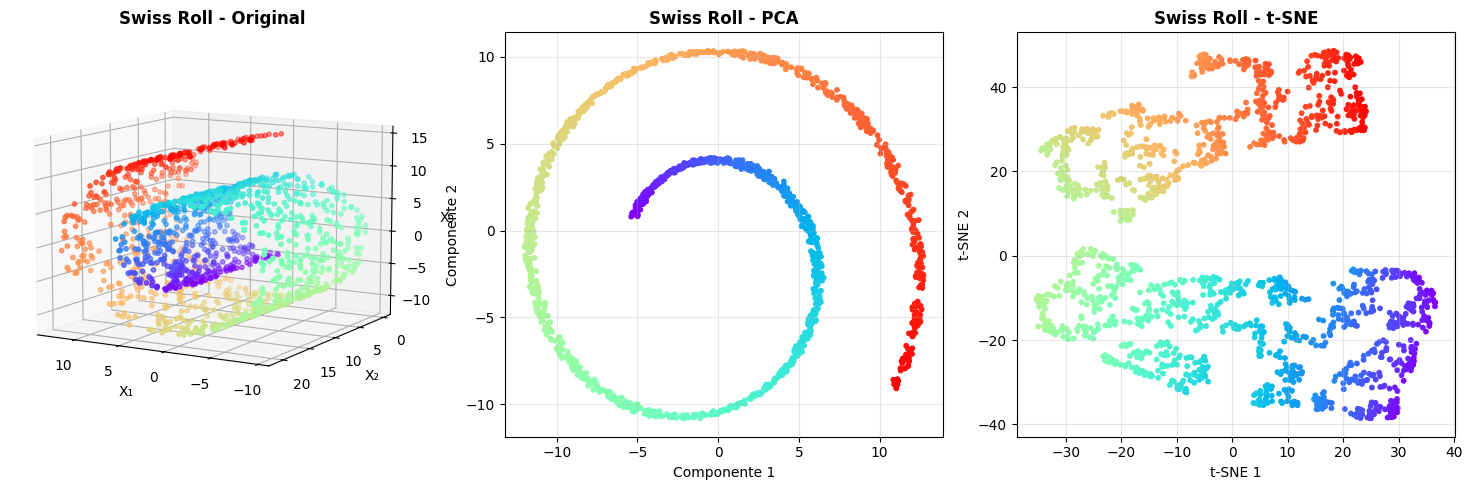

In [54]:
# ============================================================
# Swiss Roll: original (3D), PCA y t-SNE comparativo (1x3)
# ============================================================

import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 1️⃣ Dataset Swiss Roll
X, color = make_swiss_roll(n_samples=1500, noise=0.05, random_state=42)

# 2️⃣ PCA y t-SNE
X_pca = PCA(n_components=2).fit_transform(X)
X_tsne = TSNE(n_components=2, perplexity=30, init='pca', random_state=42).fit_transform(X)

# 3️⃣ Crear figura con 3 subplots (1x3)
fig = plt.figure(figsize=(15, 5))

# --- (a) Swiss roll original (3D)
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap='rainbow', s=10)
ax.set_title("Swiss Roll - Original", fontsize=12, weight='bold')
ax.set_xlabel("X₁")
ax.set_ylabel("X₂")
ax.set_zlabel("X₃")
ax.view_init(elev=10, azim=120)  # vista lateral del rollo

# --- (b) PCA
ax2 = fig.add_subplot(1, 3, 2)
sc1 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap='rainbow', s=10)
ax2.set_title("Swiss Roll - PCA", fontsize=12, weight='bold')
ax2.set_xlabel("Componente 1")
ax2.set_ylabel("Componente 2")
ax2.grid(alpha=0.3)

# --- (c) t-SNE
ax3 = fig.add_subplot(1, 3, 3)
sc2 = ax3.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap='rainbow', s=10)
ax3.set_title("Swiss Roll - t-SNE", fontsize=12, weight='bold')
ax3.set_xlabel("t-SNE 1")
ax3.set_ylabel("t-SNE 2")
ax3.grid(alpha=0.3)

plt.tight_layout()
plt.savefig("swissroll_original_pca_tsne_200dpi.png", dpi=200, bbox_inches="tight")
plt.show()



/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


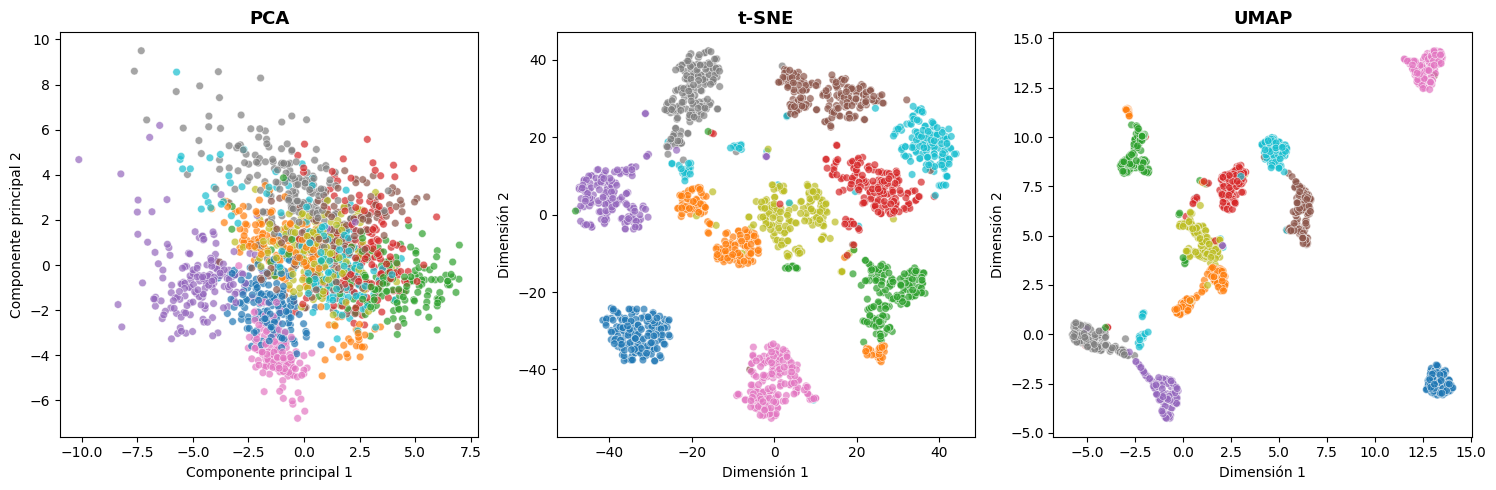

In [55]:
# -*- coding: utf-8 -*-
"""
Comparación PCA vs t-SNE vs UMAP con MNIST (1700 muestras)
Genera una figura 1x3 para presentación Beamer.
"""

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap
import numpy as np
import pandas as pd

# 1️⃣ Cargar dataset
digits = load_digits()
X = digits.data
y = digits.target

# 2️⃣ Tomar 1700 muestras aleatorias
np.random.seed(42)
idx = np.random.choice(len(X), 1700, replace=False)
X_sample = X[idx]
y_sample = y[idx]

# 3️⃣ Escalar datos
X_scaled = StandardScaler().fit_transform(X_sample)

# 4️⃣ PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 5️⃣ t-SNE
tsne = TSNE(n_components=2, init='pca', perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 6️⃣ UMAP
reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# 7️⃣ Crear DataFrames
df_pca = pd.DataFrame(X_pca, columns=['x', 'y']); df_pca['label'] = y_sample
df_tsne = pd.DataFrame(X_tsne, columns=['x', 'y']); df_tsne['label'] = y_sample
df_umap = pd.DataFrame(X_umap, columns=['x', 'y']); df_umap['label'] = y_sample

# 8️⃣ Figura comparativa
plt.figure(figsize=(15, 5))

# PCA
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_pca, x='x', y='y', hue='label', palette='tab10', s=30, alpha=0.7, legend=False)
plt.title("PCA", fontsize=13, weight='bold')
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")

# t-SNE
plt.subplot(1, 3, 2)
sns.scatterplot(data=df_tsne, x='x', y='y', hue='label', palette='tab10', s=30, alpha=0.7, legend=False)
plt.title("t-SNE", fontsize=13, weight='bold')
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")

# UMAP
plt.subplot(1, 3, 3)
sns.scatterplot(data=df_umap, x='x', y='y', hue='label', palette='tab10', s=30, alpha=0.7, legend=False)
plt.title("UMAP", fontsize=13, weight='bold')
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")

plt.tight_layout()
plt.savefig("comparacion_pca_tsne_umap_1700.png", dpi=200, bbox_inches='tight')
plt.show()


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipython-input-2565579184.py:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


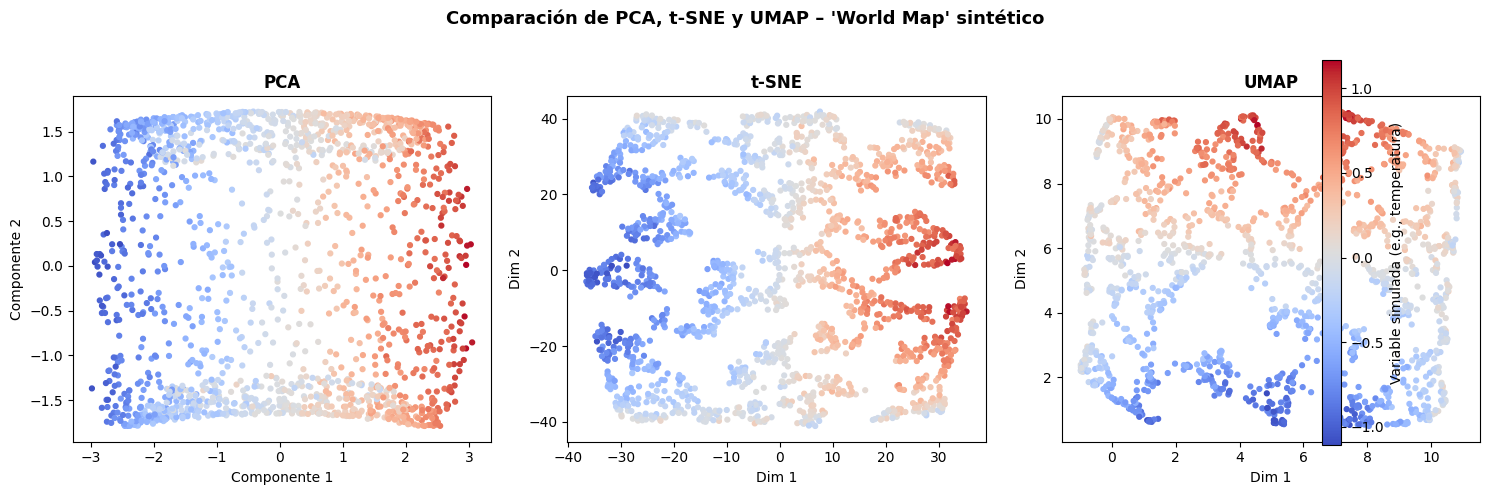

In [56]:
# -*- coding: utf-8 -*-
"""
Comparación PCA vs t-SNE vs UMAP en un 'World Map' sintético
Genera una figura de 1x3 con 200 dpi.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.preprocessing import StandardScaler

# ============================================================
# 1️⃣ Crear datos sintéticos tipo "world map"
# ============================================================

# Coordenadas de latitud y longitud (simulan puntos geográficos)
np.random.seed(42)
n_points = 1700
lat = np.random.uniform(-90, 90, n_points)
lon = np.random.uniform(-180, 180, n_points)

# Simular una variable de color (por ejemplo, temperatura)
temp = np.sin(np.radians(lat)) * np.cos(np.radians(lon / 2)) + np.random.normal(0, 0.1, n_points)

# Dataset con variables derivadas (simulan alta dimensionalidad)
X = np.vstack([
    lat,
    lon,
    np.sin(np.radians(lat)),
    np.cos(np.radians(lat)),
    np.sin(np.radians(lon)),
    np.cos(np.radians(lon)),
    temp,
]).T

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ============================================================
# 2️⃣ Reducción de dimensionalidad
# ============================================================

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# UMAP
reducer = umap.UMAP(n_components=2, n_neighbors=30, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# ============================================================
# 3️⃣ Figura comparativa
# ============================================================

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Paleta basada en temperatura
cmap = plt.cm.coolwarm

# --- PCA ---
sc1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=temp, cmap=cmap, s=12)
axes[0].set_title("PCA", fontsize=12, weight='bold')
axes[0].set_xlabel("Componente 1")
axes[0].set_ylabel("Componente 2")

# --- t-SNE ---
sc2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=temp, cmap=cmap, s=12)
axes[1].set_title("t-SNE", fontsize=12, weight='bold')
axes[1].set_xlabel("Dim 1")
axes[1].set_ylabel("Dim 2")

# --- UMAP ---
sc3 = axes[2].scatter(X_umap[:, 0], X_umap[:, 1], c=temp, cmap=cmap, s=12)
axes[2].set_title("UMAP", fontsize=12, weight='bold')
axes[2].set_xlabel("Dim 1")
axes[2].set_ylabel("Dim 2")

# Colorbar global
cbar = fig.colorbar(sc3, ax=axes, orientation="vertical", fraction=0.02, pad=0.02)
cbar.set_label("Variable simulada (e.g., temperatura)")

plt.suptitle("Comparación de PCA, t-SNE y UMAP – 'World Map' sintético", fontsize=13, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("worldmap_pca_tsne_umap.png", dpi=200, bbox_inches="tight")
plt.show()
